In [1]:
##################
### Author: Adriano Fonzino. email: adriano.fonzino@uniba.it
##################
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          path=None):
    '''
    ###############################################################################################
    CITATION: taken from: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
    ###############################################################################################
    
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sn.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    
    if path:
        plt.tight_layout()
        plt.savefig(path)


# plot different version of consensus graphs
def create_sequence_logo(df, color_scheme=None, ax=None, title=None):
    '''
    Produce Consensus plot.
    '''
    if color_scheme == None:
        color_scheme={"*":"black",
                      "T": "red",
                      "A":"green",
                      "C":"blue",
                      "G":"orange"}
    else:
        color_scheme = color_scheme
    
    if ax == None:
        crp_logo = logomaker.Logo(df,
                                  shade_below=.5,
                                  fade_below=.5,
                                  font_name='Arial Rounded MT Bold', 
                                  color_scheme=color_scheme)
        # style using Logo methods
        crp_logo.style_spines(visible=False)
        crp_logo.style_spines(spines=['left', 'bottom'], visible=True)

        # style using Axes methods
        crp_logo.ax.set_ylabel("Frequency", labelpad=-1)
        crp_logo.ax.xaxis.set_ticks_position('none')
        crp_logo.ax.xaxis.set_tick_params(pad=-1)
        plt.title(title)

In [2]:
output_folder = "/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results_CNN_inference/u87"

In [3]:
# load predictions and bonafide WT1/KO1
wt1_preds = pd.read_table(os.path.join(output_folder, "SRR388226_SRR388227.WT.outTable_853538513.gz.predictions.tsv"))
print(wt1_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/u87/SRR388226_SRR388227.WT.outTable_853538513.gz_vs_SRR388228_SRR388229.KO.outTable_921089530.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko1_preds = pd.read_table(os.path.join(output_folder, "SRR388228_SRR388229.KO.outTable_921089530.gz.predictions.tsv"))
print(ko1_preds.shape)
wt1_preds = pd.merge(bonafide, wt1_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["region", "position"], how="inner")
print(wt1_preds.shape)
ko1_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko1_preds, left_on=["ko_Region", "ko_Position"],
                     right_on=["region", "position"], how="inner")
print(ko1_preds.shape)
couple1_preds = pd.concat([wt1_preds, ko1_preds], ignore_index=True)
couple1_preds["couple"] = "couple1"
couple1_preds

(29538, 11)
(7303, 38)
(27531, 11)
(2240, 49)
(636, 49)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Strand,FreqAGrna,start,stop,int_len,TabixLen,snp_proba,ed_proba,y_hat,couple
0,chrX,19368150,A,1,144,37.78,"[142, 0, 2, 0]",AG,0.01,chrX,...,1,0.013889,19368100.0,19368200.0,101.0,101,1.089508e-11,1.000000e+00,1,couple1
1,chrX,23802232,A,1,48,40.10,"[46, 0, 2, 0]",AG,0.04,chrX,...,1,0.041667,23802182.0,23802282.0,101.0,101,7.807247e-10,1.000000e+00,1,couple1
2,chrX,24094068,A,1,40,37.38,"[34, 0, 6, 0]",AG,0.15,chrX,...,1,0.150000,24094018.0,24094118.0,101.0,101,4.608155e-09,1.000000e+00,1,couple1
3,chrX,24094073,A,1,38,39.13,"[36, 0, 2, 0]",AG,0.05,chrX,...,1,0.052632,24094023.0,24094123.0,101.0,101,9.722792e-12,1.000000e+00,1,couple1
4,chrX,24094083,A,1,40,38.85,"[37, 0, 3, 0]",AG,0.07,chrX,...,1,0.075000,24094033.0,24094133.0,101.0,101,1.704334e-12,1.000000e+00,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,chr8,95274357,A,0,53,39.25,"[29, 0, 24, 0]",AG,0.45,chr8,...,0,0.513661,95274307.0,95274407.0,101.0,101,9.999962e-01,3.859230e-06,0,couple1
2872,chr8,95531419,A,0,65,36.95,"[33, 0, 32, 0]",AG,0.49,chr8,...,0,0.506849,95531369.0,95531469.0,101.0,101,9.999553e-01,4.466190e-05,0,couple1
2873,chr8,95803750,A,1,32,40.25,"[19, 0, 13, 0]",AG,0.41,chr8,...,1,0.481481,95803700.0,95803800.0,101.0,101,9.999975e-01,2.543765e-06,0,couple1
2874,chr8,144991176,A,0,325,38.59,"[141, 0, 184, 0]",AG,0.57,chr8,...,0,0.423529,144991126.0,144991226.0,101.0,101,9.998366e-01,1.634423e-04,0,couple1


In [4]:
# merge prediction into a unique list
merged_preds = pd.concat([couple1_preds], axis=0)
merged_preds

,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Strand,FreqAGrna,start,stop,int_len,TabixLen,snp_proba,ed_proba,y_hat,couple
0,chrX,19368150,A,1,144,37.78,"[142, 0, 2, 0]",AG,0.01,chrX,...,1,0.013889,19368100.0,19368200.0,101.0,101,1.089508e-11,1.000000e+00,1,couple1
1,chrX,23802232,A,1,48,40.10,"[46, 0, 2, 0]",AG,0.04,chrX,...,1,0.041667,23802182.0,23802282.0,101.0,101,7.807247e-10,1.000000e+00,1,couple1
2,chrX,24094068,A,1,40,37.38,"[34, 0, 6, 0]",AG,0.15,chrX,...,1,0.150000,24094018.0,24094118.0,101.0,101,4.608155e-09,1.000000e+00,1,couple1
3,chrX,24094073,A,1,38,39.13,"[36, 0, 2, 0]",AG,0.05,chrX,...,1,0.052632,24094023.0,24094123.0,101.0,101,9.722792e-12,1.000000e+00,1,couple1
4,chrX,24094083,A,1,40,38.85,"[37, 0, 3, 0]",AG,0.07,chrX,...,1,0.075000,24094033.0,24094133.0,101.0,101,1.704334e-12,1.000000e+00,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,chr8,95274357,A,0,53,39.25,"[29, 0, 24, 0]",AG,0.45,chr8,...,0,0.513661,95274307.0,95274407.0,101.0,101,9.999962e-01,3.859230e-06,0,couple1
2872,chr8,95531419,A,0,65,36.95,"[33, 0, 32, 0]",AG,0.49,chr8,...,0,0.506849,95531369.0,95531469.0,101.0,101,9.999553e-01,4.466190e-05,0,couple1
2873,chr8,95803750,A,1,32,40.25,"[19, 0, 13, 0]",AG,0.41,chr8,...,1,0.481481,95803700.0,95803800.0,101.0,101,9.999975e-01,2.543765e-06,0,couple1
2874,chr8,144991176,A,0,325,38.59,"[141, 0, 184, 0]",AG,0.57,chr8,...,0,0.423529,144991126.0,144991226.0,101.0,101,9.998366e-01,1.634423e-04,0,couple1


In [5]:
# save to disk full predictions
merged_preds.to_csv(os.path.join(output_folder, "MERGED_PREDS.tsv"), sep="\t", index=None)

In [6]:
print(classification_report(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1254
           1       0.97      1.00      0.98      1622

    accuracy                           0.98      2876
   macro avg       0.98      0.98      0.98      2876
weighted avg       0.98      0.98      0.98      2876



In [7]:
print("Accuracy:", accuracy_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
print("Balanced Accuracy:", balanced_accuracy_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
print("Precision:", precision_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
print("Recall:", recall_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
print("F1-score", f1_score(merged_preds["Class_binary"].values, merged_preds["y_hat"].values))
cm = confusion_matrix(merged_preds["Class_binary"].values, merged_preds["y_hat"].values)
print(cm)

Accuracy: 0.9777468706536857
Balanced Accuracy: 0.9751148974330233
Precision: 0.9659090909090909
Recall: 0.9956843403205918
F1-score 0.9805707346690953
[[1197   57]
 [   7 1615]]


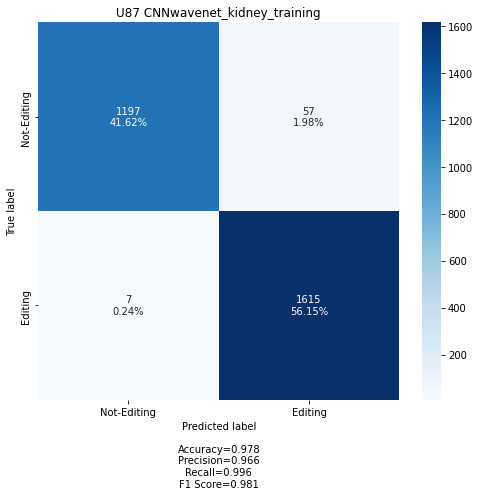

In [8]:
# confusion matrix
make_confusion_matrix(cf=cm,
                          group_names=None,
                          categories=["Not-Editing", "Editing"],
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(7,7),
                          cmap='Blues',
                          title="U87 CNNwavenet_kidney_training",
                          path=os.path.join(output_folder, "ConfMatr.tiff"))